In [44]:
# Import all library that we need

import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from pandas_profiling import ProfileReport
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'cross_val_score' from 'sklearn.linear_model' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [3]:
df = pd.read_csv(r"C:\Users\vaibh\Downloads\Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
df.shape

(200, 4)

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

<AxesSubplot:>

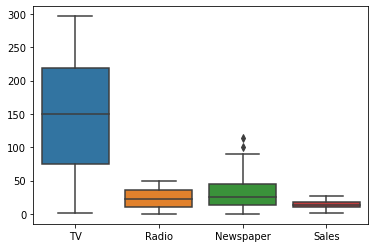

In [12]:
sns.boxplot(data=df)

# Feature Selection

<AxesSubplot:>

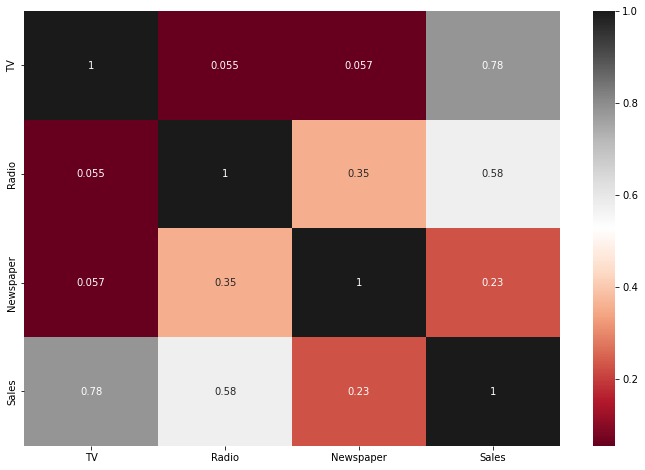

In [13]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap = 'RdGy')

In [15]:
x = df.drop(columns= ['Sales'])

In [16]:
y = df['Sales']

In [17]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [19]:
x.shape

(200, 3)

In [20]:
y.shape

(200,)

In [21]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.30, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
import pickle
pickle.dump(lr,open('Advertising_lr_model.pickle','wb'))

In [29]:
model=pickle.load((open('Advertising_lr_model.pickle','rb')))

In [30]:
model

LinearRegression()

In [31]:
test=scaler.transform([[230.,37.8,69.2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
model.predict(test)

array([20.85191679])

In [35]:
lr.score(X_test,y_test)

0.8609466508230366

In [36]:
lr.score(X_train,y_train)

0.9055159502227753

In [37]:
lr.coef_

array([3.68334078, 2.90625242, 0.14194772])

In [38]:
lr.intercept_

14.497142857142858

In [39]:
# Linear Regression with LASSO
lassocv = LassoCV(cv=10, max_iter=200000, normalize=True)
lassocv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=200000, normalize=True)

In [40]:
lassocv.alpha_

0.00032789249705378185

In [41]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.00032789249705378185)

In [42]:
lasso.score(X_test,y_test)

0.8609618059905612

In [46]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mse

array([-2.96702057, -2.73017719, -1.0956036 , -1.79851667, -2.28164874,
       -2.02886933, -2.50626956, -2.16858784, -8.58027515, -1.46692104])

In [47]:
np.mean(mse)

-2.7623889698854316

In [48]:
reg_predict=lr.predict(X_test)
reg_predict

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [49]:
# Create Linear Regression with Ridge
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50), cv=10, normalize=True)
ridgecv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

RidgeCV(alphas=array([2.87479488, 4.62097835, 0.1035097 , 4.42224406, 3.33266536,
       5.76029983, 2.71757302, 9.47199667, 0.26350315, 3.58190233,
       2.72765741, 2.96157428, 8.02867315, 2.43223336, 5.97218482,
       0.61416984, 1.92426067, 5.69766652, 6.3076746 , 4.80637623,
       5.64687632, 3.88999545, 9.76603471, 0.84729787, 6.65354795,
       9.66583253, 7.24946243, 7.30257488, 9.50746569, 1.20938936,
       0.06794191, 0.87354553, 2.68086948, 9.3769106 , 1.69367273,
       0.65909562, 9.21325709, 5.58827674, 0.63548993, 2.26638947,
       2.79333497, 0.54354252, 7.8863998 , 5.09732022, 3.91344737,
       1.58465023, 2.98292603, 8.74063973, 0.9313938 , 4.89702401]),
        cv=10, normalize=True)

In [50]:
ridgecv.alpha_

0.06794190820171186

In [51]:
ridge_lr=Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(X_train,y_train)

Ridge(alpha=0.06794190820171186)

In [52]:
ridge_lr.fit(X_test,y_test)

Ridge(alpha=0.06794190820171186)

In [53]:
ridge_lr.score(X_test,y_test)

0.8933773919343095

In [54]:
ridge_lr.score(X_train,y_train)

0.8768707521962783

In [55]:
# Creat Linear Regression with elasticNet
elastic = ElasticNetCV(alphas=None,cv=10,normalize=True)
elastic.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


ElasticNetCV(cv=10, normalize=True)

In [56]:
elastic.alpha_

0.0006557849941075638

In [57]:
elastic.l1_ratio_

0.5

In [58]:
elastic_lr=ElasticNet(alpha=elastic.alpha_, l1_ratio=elastic.l1_ratio_)
elastic_lr.fit(X_train,y_train)

ElasticNet(alpha=0.0006557849941075638)

In [59]:
elastic_lr.score(X_test,y_test)

0.8609578481758349

In [60]:
elastic_lr.score(X_train,y_train)

0.9055158072437137